# Proyecto #1

## Course: Data science in Python
## Name: Otto Chamo
## Carnet: 19001395
## Sección: V


# Importing libraries

In [84]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import utility_functions as ufs
from correlation_plot_args import CorrelationPlotArgs
from linear_regression_model import LinearRegresionModel
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model



# Loading dataset

In [86]:
dataset = pd.DataFrame(np.load('./data/proyecto_training_data.npy'))

dataset.head()

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [87]:
dataset.isnull().sum()

0      0
1      0
2      0
3      0
4      0
5    259
dtype: int64

# The project

### Renaming columns to their descriptive names provided in <code>data/Data fields.txt</code>

In [88]:
SALE_PRICE_COL = "SalePrice"
OVERALL_QUAL_COL = "OverallQual"
FIRST_FLOOR_SF_COL = "1stFlrSF"
TOTAL_ROOMS_ABOVE_GRADE_COL = "TotRmsAbvGrd"
YEAR_BUILT_COL = "YearBuilt"
LOT_FRONTAGE_COL = "LotFrontage"


In [89]:
dataset = dataset.rename(columns={
    0: SALE_PRICE_COL,
    1: OVERALL_QUAL_COL,
    2: FIRST_FLOOR_SF_COL,
    3: TOTAL_ROOMS_ABOVE_GRADE_COL,
    4: YEAR_BUILT_COL,
    5: LOT_FRONTAGE_COL
})

dataset.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


## Dataset dimension

In [90]:
dataset.shape

(1460, 6)

## Dataset data types

In [91]:
dataset.dtypes

SalePrice       float64
OverallQual     float64
1stFlrSF        float64
TotRmsAbvGrd    float64
YearBuilt       float64
LotFrontage     float64
dtype: object

## Data preprocessing

### Inspecting dataset

In [92]:
datasetDesc = dataset.describe()

## Inspecting values and getting range

In [93]:
rangeSalePrice = ufs.calculateRangeForColumn(datasetDesc, SALE_PRICE_COL)
rangeOverallQuality = ufs.calculateRangeForColumn(datasetDesc, OVERALL_QUAL_COL)
range1sfFloor = ufs.calculateRangeForColumn(datasetDesc, FIRST_FLOOR_SF_COL)
rangeTotRms = ufs.calculateRangeForColumn(datasetDesc, TOTAL_ROOMS_ABOVE_GRADE_COL)
rangeYearBuilt = ufs.calculateRangeForColumn(datasetDesc, YEAR_BUILT_COL)
rangeLotFrontage = ufs.calculateRangeForColumn(datasetDesc, LOT_FRONTAGE_COL)
print(f"rangeOverallQuality: {rangeOverallQuality}")
print(f"range1sfFloor: {range1sfFloor}")
print(f"rangeTotRms: {rangeTotRms}")
print(f"rangeYearBuilt: {rangeYearBuilt}")
print(f"rangeLotFrontage: {rangeLotFrontage}")
# updating dataset description to include range
newRow = [rangeSalePrice, rangeOverallQuality, range1sfFloor, rangeTotRms, rangeYearBuilt, rangeLotFrontage]
newRowDf = pd.DataFrame([newRow], index=['Range'], columns=datasetDesc.columns)
datasetTrainDescription = pd.concat([datasetDesc, newRowDf])

datasetTrainDescription

rangeOverallQuality: 9.0
range1sfFloor: 4358.0
rangeTotRms: 12.0
rangeYearBuilt: 138.0
rangeLotFrontage: 292.0


,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000
Range,720100.000000,9.000000,4358.000000,12.000000,138.000000,292.000000


### Detecting nulls

In [94]:
dataset.isnull().sum()

SalePrice         0
OverallQual       0
1stFlrSF          0
TotRmsAbvGrd      0
YearBuilt         0
LotFrontage     259
dtype: int64

### Displaying percentage of nulls

In [95]:
dataset.isna().sum() / (dataset.shape[0] / 100)

SalePrice        0.000000
OverallQual      0.000000
1stFlrSF         0.000000
TotRmsAbvGrd     0.000000
YearBuilt        0.000000
LotFrontage     17.739726
dtype: float64

### Applyin mean imputation


In [96]:
dataset = dataset.fillna(dataset.mean())

In [97]:
dataset.isna().sum() / (dataset.shape[0] / 100)

SalePrice       0.0
OverallQual     0.0
1stFlrSF        0.0
TotRmsAbvGrd    0.0
YearBuilt       0.0
LotFrontage     0.0
dtype: float64

### Applying min-max normalization

In [98]:
def normalization_with_min_max(col):
  max_val = np.max(col)
  min_val = np.min(col)

  return (col - min_val) / (max_val - min_val)


In [99]:
normalizedDataset = dataset.copy()

for column in normalizedDataset.columns:
  normalizedDataset[column] = normalization_with_min_max(normalizedDataset[column])

normalizedDataset.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.202779,0.566591,0.190139,0.376484,0.719332,0.167979
std,0.110321,0.153666,0.088708,0.135449,0.218862,0.075425
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.132030,0.444444,0.125746,0.250000,0.594203,0.133562
50%,0.177892,0.555556,0.172786,0.333333,0.731884,0.167979
75%,0.248715,0.666667,0.242600,0.416667,0.927536,0.198630
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## We want to predict the SalePrice so we take that as our dependent variable $(y) and we remove it from the dataset

In [100]:
salePriceColumn = normalizedDataset.SalePrice

datasetToWork = normalizedDataset.copy().drop(SALE_PRICE_COL, axis=1)

datasetToWork

,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,0.666667,0.119780,0.500000,0.949275,0.150685
1,0.555556,0.212942,0.333333,0.753623,0.202055
2,0.666667,0.134465,0.333333,0.934783,0.160959
3,0.666667,0.143873,0.416667,0.311594,0.133562
4,0.777778,0.186095,0.583333,0.927536,0.215753
...,...,...,...,...,...
1455,0.555556,0.142038,0.416667,0.920290,0.140411
1456,0.555556,0.399036,0.416667,0.768116,0.219178
1457,0.666667,0.195961,0.583333,0.500000,0.154110
1458,0.444444,0.170721,0.250000,0.565217,0.160959


## 2. Splitting in 80% and 20% for validation and testing

In [101]:
dataset_train, dataset_test, salesColumn_train, salesColumn_test = train_test_split(datasetToWork, salePriceColumn, test_size=0.2)

## 3. Exploring some values of the dataset and calculating range

In [102]:
datasetTrainDescription: pd.DataFrame = dataset_train.describe()

datasetTrainDescription

,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,0.566305,0.191747,0.376284,0.715561,0.167417
std,0.154558,0.090037,0.137209,0.220895,0.073373
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.444444,0.125746,0.250000,0.586957,0.133562
50%,0.555556,0.173704,0.333333,0.724638,0.167979
75%,0.666667,0.249656,0.416667,0.934783,0.195205
max,1.000000,1.000000,1.000000,1.000000,1.000000


## 4. Ploting an histogram for each variable

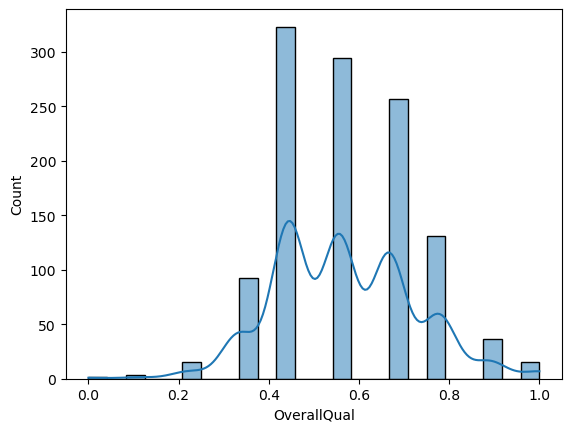

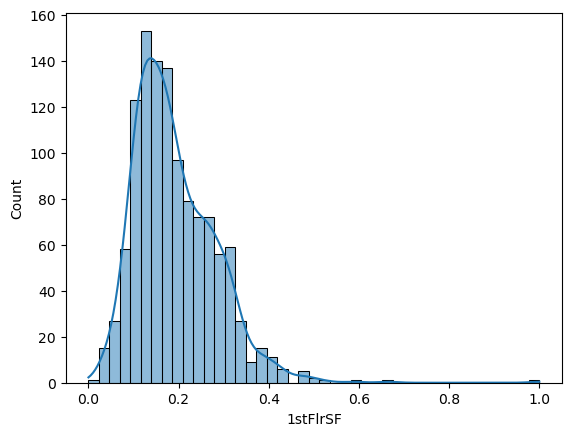

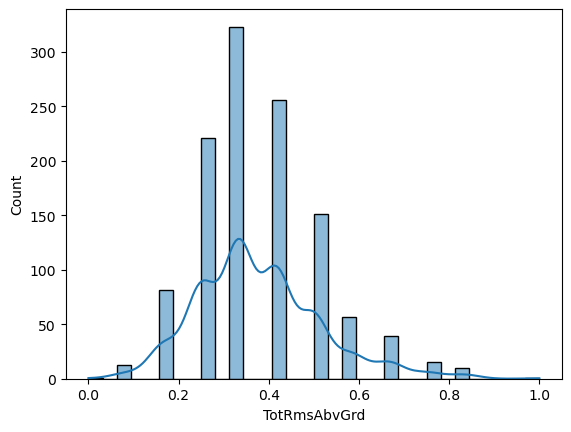

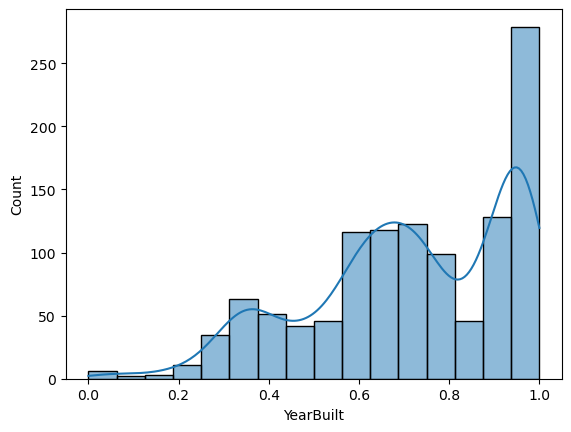

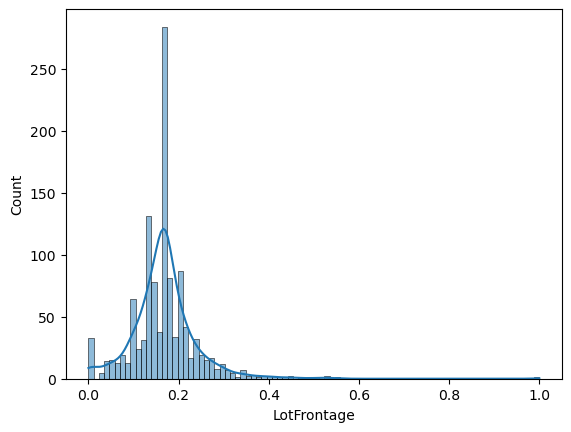

In [103]:
ufs.plot_columns(dataset_train)

## Calculating correlation coefficient of each independent variable.

The Equation for this coefficient is the following

$$
    r = \frac{\sum x_iy_i}{\sqrt{(\sum x_i^2)(\sum y_i^2)}}
$$

Where $x_i = (x_i - \overline{x})$ and $y_i = (y_i - \overline{y})$


### 5.1 Calculating correlation values between variables

In [104]:
corrOverallQual = ufs.calculateCorrelation(dataset_train[OVERALL_QUAL_COL], salesColumn_train)
corrFirstFloor = ufs.calculateCorrelation(dataset_train[FIRST_FLOOR_SF_COL], salesColumn_train)
corrTotalRooms = ufs.calculateCorrelation(dataset_train[TOTAL_ROOMS_ABOVE_GRADE_COL], salesColumn_train)
corrYearBuilt = ufs.calculateCorrelation(dataset_train[YEAR_BUILT_COL], salesColumn_train)
corrLotFrontage = ufs.calculateCorrelation(dataset_train[LOT_FRONTAGE_COL], salesColumn_train)

ufs.printCorrelation(OVERALL_QUAL_COL, corrOverallQual[0, 1])
ufs.printCorrelation(FIRST_FLOOR_SF_COL, corrFirstFloor[0, 1])
ufs.printCorrelation(TOTAL_ROOMS_ABOVE_GRADE_COL, corrTotalRooms[0, 1])
ufs.printCorrelation(YEAR_BUILT_COL, corrYearBuilt[0, 1])
ufs.printCorrelation(LOT_FRONTAGE_COL, corrLotFrontage[0, 1])


Correlation for OverallQual = 0.7881
Correlation for 1stFlrSF = 0.6184
Correlation for TotRmsAbvGrd = 0.5409
Correlation for YearBuilt = 0.5070
Correlation for LotFrontage = 0.3549


### 5.2 Plot Scatter plot for each variable using matplotlib.
### Chooose two that have the greater correlation coefficient.

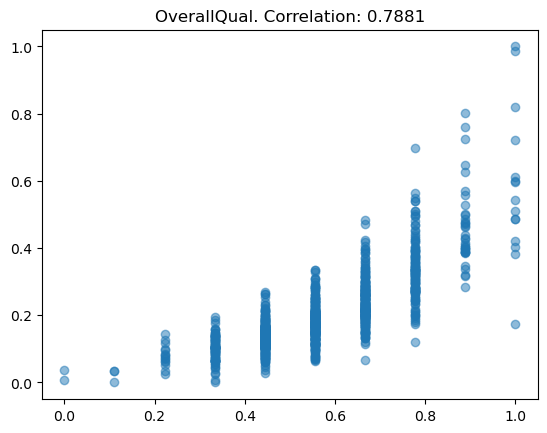

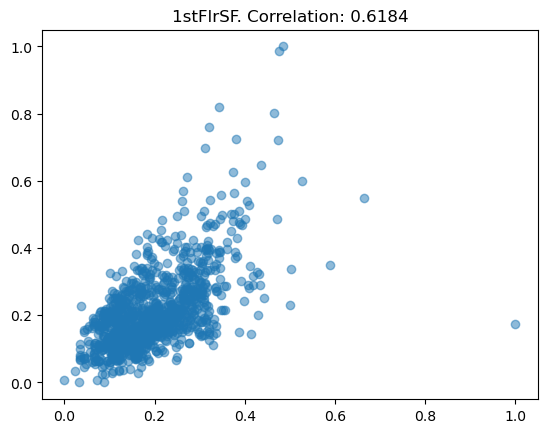

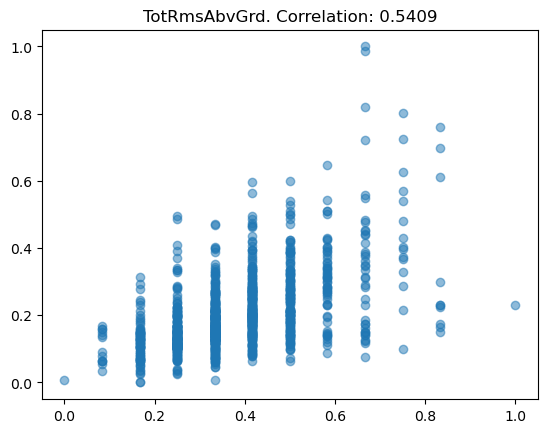

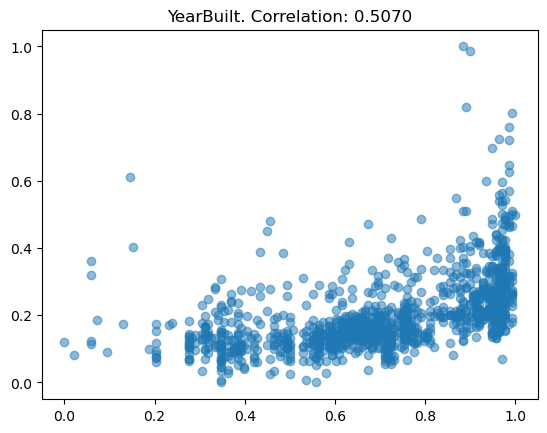

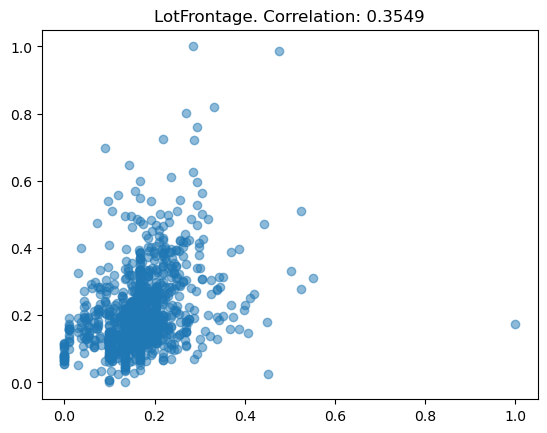

In [105]:
args = CorrelationPlotArgs(
    x = dataset_train[OVERALL_QUAL_COL],
    y = salesColumn_train,
    correlation= corrOverallQual[0, 1],
    title=OVERALL_QUAL_COL
)
ufs.plotScatterPlot(args)

args = CorrelationPlotArgs(
    x = dataset_train[FIRST_FLOOR_SF_COL],
    y = salesColumn_train,
    correlation= corrFirstFloor[0, 1],
    title=FIRST_FLOOR_SF_COL
)
ufs.plotScatterPlot(args)

args = CorrelationPlotArgs(
    x = dataset_train[TOTAL_ROOMS_ABOVE_GRADE_COL],
    y = salesColumn_train,
    correlation=corrTotalRooms[0, 1],
    title=TOTAL_ROOMS_ABOVE_GRADE_COL
)
ufs.plotScatterPlot(args)

args = CorrelationPlotArgs(
    x = dataset_train[YEAR_BUILT_COL],
    y = salesColumn_train,
    correlation=corrYearBuilt[0, 1],
    title=YEAR_BUILT_COL
)
ufs.plotScatterPlot(args)

args = CorrelationPlotArgs(
    x = dataset_train[LOT_FRONTAGE_COL],
    y = salesColumn_train,
    correlation=corrLotFrontage[0, 1],
    title=LOT_FRONTAGE_COL
)
ufs.plotScatterPlot(args)

The variables we are gonna pick are OverrallQual and 1stFlrSF

## Applying log transform

In [106]:
#from sklearn.preprocessing import FunctionTransformer
#from sklearn.compose import ColumnTransformer
#log_transform = FunctionTransformer(lambda x: np.log(x))
#ct = ColumnTransformer(transformers=[['log_transform',log_transform,list(range(len(dataset_train.columns)))]],remainder='passthrough')
#log_X = ct.fit_transform(dataset_train).copy()
#log_X = pd.DataFrame(log_X,columns=dataset_train.columns).copy()

#log_X

## Lineal Regression from scratch (no libraries)
$$y = \beta_0 + \beta_1x $$

In [168]:
def calculate_error(y: np.ndarray, yPred: np.ndarray, n: int):
    resultSum = 0
    substractions = []
    resultSubstraction = ((y - yPred) ** 2)
    for i in range(0, n):
        x_0 = y[i]
        y_0 = yPred[i]
        operation = (y[i] - yPred[i]) ** 2
        substractions.append(operation)
        resultSum = resultSum + operation
    
    resultSubstraction = np.sum(((y - yPred)** 2))
    division = (1/(2*n))
    errorSum = division * resultSum
    errorNpSum = division * resultSubstraction
    #print(f"error with np.sum {errorNpSum}")
    #print(f"error with loop {errorSum}")
    return errorNpSum
    

In [171]:
def calculate_gradient_b1(yPred: np.ndarray, y: np.ndarray, x: np.ndarray, n: int):
    substraction = (yPred - y) * x
    resultSum = np.sum(substraction)
    
    resultNp = (1 / n) * resultSum
    return resultNp


def calculate_gradient_b0(yPred: np.ndarray, y: np.ndarray, n: int):
    resultDivision = 1/n
    sum = 0
    resultSum = np.sum((yPred[:n+1] - y[:n+1]) * 1 )
    for i in range(0, n):
        sum = (yPred[i] - y[i])
    result = resultDivision * sum
    return result

def update_parameter_b1(b1: float, alpha: float, gradient_b1: float):
    result = b1 - (alpha * gradient_b1)
    return result

def update_parameter_b0(b0: float, alpha: float, gradient_b0: float):
    result = b0 - (alpha * gradient_b0)
    return result

In [172]:
def train_model(x, y, epochs: int, imprimir_error_cada: int, learning_rate: float):
    onesArray = np.ones_like(x)
    beta_0, beta_1 = 0.4, 0.3
    betas = np.zeros(2)
    betas[0] = beta_0
    betas[1] = beta_1
    errors = []
    models: list[LinearRegresionModel] = []
    observationArray = np.column_stack((x, onesArray))
    yPred = 0.0
    error = 0.0
    for i in range(0, epochs):
        n = i + 1
        if n % imprimir_error_cada == 0:
            print(f"Obtained error in iteration {i + 1}: {error}")
        if i == 0:
            yPred = np.dot(observationArray, betas)
            error = calculate_error(y, yPred, n=yPred.size)
            errors.append(error)
            models.append(LinearRegresionModel(yPred=yPred, iteration=i))
        else:
            gradientB1 = calculate_gradient_b1(yPred=yPred, y=y, x=x, n=yPred.size)
            gradientB0 = calculate_gradient_b0(yPred=yPred, y=y, n=yPred.size)
            beta_0 = update_parameter_b0(b0=beta_0, alpha=learning_rate, gradient_b0=gradientB0)
            beta_1 = update_parameter_b1(b1=beta_1, alpha=learning_rate, gradient_b1=gradientB1)
            betas[0] = beta_0
            betas[1] = beta_1
            yPred = np.dot(observationArray, betas)
            error = calculate_error(y, yPred, n=yPred.size)
            errors.append(error)
            models.append(LinearRegresionModel(yPred=yPred, iteration=i))
    
vectorTrainOverallQual = dataset_train[OVERALL_QUAL_COL].to_numpy()
vectorTrainSalesColumn = salesColumn_train.to_numpy()

print(f"shape trainoverallQual: {vectorTrainOverallQual}")
print(f"shape trainSales: {vectorTrainSalesColumn}")

train_model(x=dataset_train[OVERALL_QUAL_COL].to_numpy(),y=salesColumn_train.to_numpy(), epochs=80, imprimir_error_cada=10, learning_rate=0.04)


#error with np.sum 0.054803546534489496
#error with loop 0.05480354653448945


shape trainoverallQual: [0.66666667 0.55555556 0.77777778 ... 0.77777778 0.55555556 0.55555556]
shape trainSales: [0.21816414 0.2348285  0.30981808 ... 0.29870851 0.20136092 0.20844327]
Obtained error in iteration 10: 0.03916508748010428
Obtained error in iteration 20: 0.026113680253846083
Obtained error in iteration 30: 0.017798348796267686
Obtained error in iteration 40: 0.01249015739521428
Obtained error in iteration 50: 0.009093472906612589
Obtained error in iteration 60: 0.006913545803298078
Obtained error in iteration 70: 0.005509478952138301
Obtained error in iteration 80: 0.004601195051019315


## Model with scikit

In [110]:
regresionSciKit = linear_model.LinearRegression()
vectorTrainOverallQual
regresionSciKit.fit(vectorTrainOverallQual)


[0.66666667 0.55555556 0.77777778 ... 0.77777778 0.55555556 0.55555556]


ValueError: X has 292 features, but LinearRegression is expecting 1168 features as input.

### 

## Sources?

https://vitalflux.com/pearson-correlation-coefficient-statistical-significance/